# Welcome to Claire's PAW Tracker! This is an education tool to provide an anlaysis of a dog's breathing rate per minute. 
## Breathing rate tracking is critical for pets with cardiac issues. Breathing rate should be measured when your pet is asleep. 
### Ordinary Least Squares regression (OLS) is used to determine if there is a correlation between furosemide (diuretic) and breathing rate. Escalated breathing rates can indicate fluid in their lungs.
### Monitoring breathing rate per minute is important for dogs with cardiac issues.
## Seek advice from a qualified veterinarian.

In [1]:
#### Claire's PAW tracker is meant to be an education tool to provide an anlaysis of a dog's breathing rate per minute. 
# Monitoring breathing rate per minute is important for dogs with cardiac issues.
# Seek advise from a qualified vet for advice.

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Read the data from Griffskode's Github 

In [2]:
# Import csv into pandas dataframe
# df = pd.read_csv('breathingdata.csv', sep=',')
# Import the dataset breathingdata.csv into pandas dataframe, "df"
url = "https://raw.githubusercontent.com/GriffsKode/griffskode.github.io/main/files/breathingdata.csv"
df = pd.read_csv(url, sep=",")
df2 = df.copy()
#Print first five lines of the imported csv file to ensure data was imported correctly
df.head(5)

,date_time,date,time,breaths_per_minute,furosemide_dose,vetmedin_dose,enalapril_dose
0,2/24/2024 15:50,2/24/2024,15:50,23.0,0.7,1.25,1.25
1,2/24/2024 15:52,2/24/2024,15:52,22.0,0.7,1.25,1.25
2,2/24/2024 21:34,2/24/2024,21:34,12.0,0.7,1.25,1.25
3,2/24/2024 21:36,2/24/2024,21:36,12.0,0.7,1.25,1.25
4,2/25/2024 13:13,2/25/2024,13:13,14.0,0.7,1.25,1.25


In [3]:
# Print last five lines of the imported csv file to ensure all data was imported
df.tail(5)

,date_time,date,time,breaths_per_minute,furosemide_dose,vetmedin_dose,enalapril_dose
201,9/11/2024 23:06,9/11/2024,11:06 PM,13.0,0.8,1.25,1.25
202,9/13/2024 7:56,9/13/2024,7:56 AM,15.0,0.8,1.25,1.25
203,9/15/2024 11:58,9/15/2024,11:58 AM,15.0,0.8,1.25,1.25
204,9/16/2024 17:30,9/16/2024,5:30 PM,39.0,0.8,1.25,1.25
205,9/16/2024 17:45,9/16/2024,5:45 PM,38.0,0.8,1.25,1.25


## We want to get a basic idea of the count, mean, std, min, max, etc. for Breaths Per Minute and Medicine Dose

In [4]:
# Pandas dataframe describe function to better understand the data. 
summary = df.describe()
formatted_summary = summary.round(2)
print(formatted_summary)

       breaths_per_minute  furosemide_dose  vetmedin_dose  enalapril_dose
count              193.00           205.00         206.00          206.00
mean                15.90             0.72           1.25            1.25
std                  4.45             0.12           0.00            0.00
min                  9.00             0.50           1.25            1.25
25%                 13.00             0.60           1.25            1.25
50%                 15.00             0.80           1.25            1.25
75%                 18.00             0.80           1.25            1.25
max                 39.00             0.80           1.25            1.25


## A monthly breakdown of breaths_per_minute is calculated to better understand the monthly average. 

In [5]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the 'date' column
df['year_month'] = df['date'].dt.to_period('M')

# Calculate monthly averages of 'breaths_per_minute'
monthly_avg = df.groupby('year_month')['breaths_per_minute'].mean().round(1).reset_index()

# Rename the column to 'Average breaths_per_minute'
monthly_avg = monthly_avg.rename(columns={'breaths_per_minute': 'Average breaths_per_minute'})

# Display the result
print(monthly_avg)

  year_month  Average breaths_per_minute
0    2024-02                        16.0
1    2024-03                        17.5
2    2024-04                        16.6
3    2024-05                        18.5
4    2024-06                        15.6
5    2024-07                        14.3
6    2024-08                        14.1
7    2024-09                        17.4


## A simple scatter plot is created to visualize the data

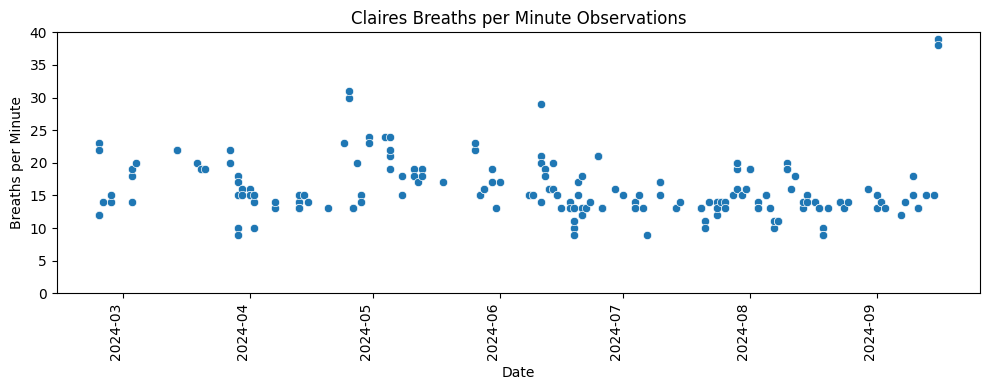

In [6]:
# Create an x date dataframe, y breaths per minute data frame. Combine both into the variable data. 
x = df['date']
y = df['breaths_per_minute']
data = pd.DataFrame({'Date': x, 'Breaths per Minute': y})

# Create scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Date', y='Breaths per Minute', data=data)

# Format x-axis labels
plt.xticks(rotation=90, ha='right')
# Set y-axis range
plt.ylim(0, 40)

# Add title and labels
plt.title('Claires Breaths per Minute Observations')
plt.xlabel('Date')
plt.ylabel('Breaths per Minute')

plt.tight_layout()
plt.show()

## Next we want to get an idea of the frequency that the range of breaths per minute occurs.

Text(0, 0.5, 'Number of Data Points')

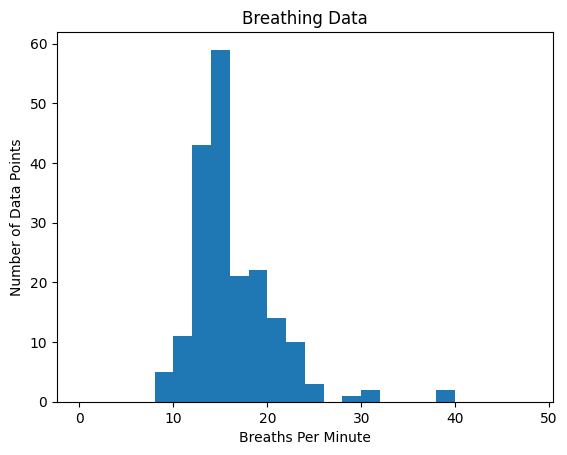

In [7]:
plt.hist(df['breaths_per_minute'], bins = range(0,50,2))
plt.title('Breathing Data')
plt.xlabel('Breaths Per Minute')
plt.ylabel('Number of Data Points')

## OLS Regression is used to see if there is a correlation between furosemide_dose and breaths_per_minute.
## P>|t| value should be greater than 0.05 to be significant.

In [8]:
# OLS Regression to determine if the furosemide_dose has a correlation with breaths per minute.
# P>|t| value should be greater than 0.05 to be significant. 
est = ols(formula="breaths_per_minute ~ furosemide_dose", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     breaths_per_minute   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     5.893
Date:                Tue, 17 Sep 2024   Prob (F-statistic):             0.0161
Time:                        07:58:46   Log-Likelihood:                -555.92
No. Observations:                 192   AIC:                             1116.
Df Residuals:                     190   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          20.6980      2.008     

## Next we want to visualize the overall linear trend of breaths_per_minute

Data DataFrame:
          Date  Breaths per Minute  Date_Ordinal
0   2024-02-24                23.0        738940
1   2024-02-24                22.0        738940
2   2024-02-24                12.0        738940
3   2024-02-24                12.0        738940
4   2024-02-25                14.0        738941
..         ...                 ...           ...
201 2024-09-11                13.0        739140
202 2024-09-13                15.0        739142
203 2024-09-15                15.0        739144
204 2024-09-16                39.0        739145
205 2024-09-16                38.0        739145

[206 rows x 3 columns]


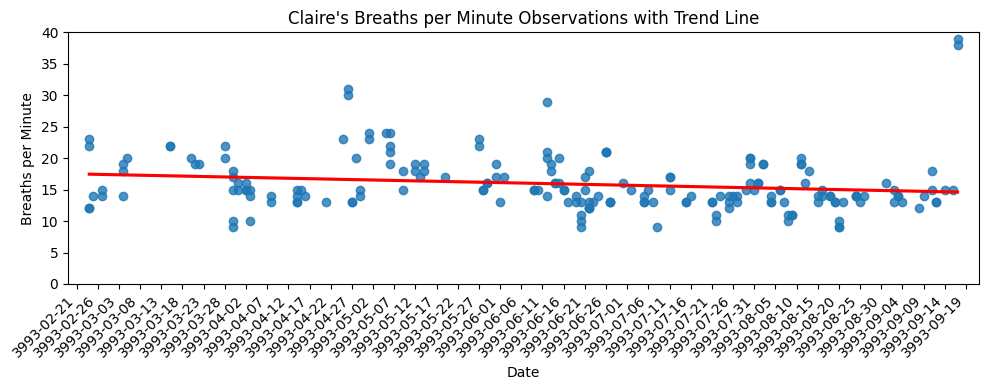

In [9]:
# df2 was stored at the beginning as the preserved data. 
df = df2.copy()
df['date'] = pd.to_datetime(df['date'])

# Create an x date dataframe, y breaths per minute data frame. Combine both into the variable data.
x = df['date']
y = df['breaths_per_minute']
data = pd.DataFrame({'Date': x, 'Breaths per Minute': y})

# Convert date to numerical format for trend line (since regression requires numerical values)
data['Date_Ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

# Debugging: Print the contents of the DataFrame
print("Data DataFrame:")
print(data)

# Create scatter plot with linear trendline
plt.figure(figsize=(10, 4))

# Plot using 'Date_Ordinal' for regression line
sns.regplot(x='Date_Ordinal', y='Breaths per Minute', data=data, scatter=True, line_kws={"color": "red"}, ci=None)

# Set x-axis limits using ordinal dates directly
min_ordinal = data['Date_Ordinal'].min() - 5
max_ordinal = data['Date_Ordinal'].max() + 5

# Set x-axis limits
plt.xlim([min_ordinal, max_ordinal])

# Format x-axis to show actual dates
def ordinal_to_date(ordinal):
    return pd.to_datetime(ordinal, origin='julian', unit='D')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Set y-axis range
plt.ylim(0, 40)

# Add title and labels
plt.title('Claire\'s Breaths per Minute Observations with Trend Line')
plt.xlabel('Date')
plt.ylabel('Breaths per Minute')

plt.tight_layout()
plt.show()

In [10]:
print(df)

           date_time       date      time  breaths_per_minute  \
0    2/24/2024 15:50 2024-02-24     15:50                23.0   
1    2/24/2024 15:52 2024-02-24     15:52                22.0   
2    2/24/2024 21:34 2024-02-24     21:34                12.0   
3    2/24/2024 21:36 2024-02-24     21:36                12.0   
4    2/25/2024 13:13 2024-02-25     13:13                14.0   
..               ...        ...       ...                 ...   
201  9/11/2024 23:06 2024-09-11  11:06 PM                13.0   
202   9/13/2024 7:56 2024-09-13   7:56 AM                15.0   
203  9/15/2024 11:58 2024-09-15  11:58 AM                15.0   
204  9/16/2024 17:30 2024-09-16   5:30 PM                39.0   
205  9/16/2024 17:45 2024-09-16   5:45 PM                38.0   

     furosemide_dose  vetmedin_dose  enalapril_dose  
0                0.7           1.25            1.25  
1                0.7           1.25            1.25  
2                0.7           1.25            1.25  
3  